In [1]:
import numpy as np
import sympy as sp

In [2]:
x = sp.Symbol("x")
y = sp.Symbol("y")
z = x ** 2 + y ** 2 - 4
z

x**2 + y**2 - 4

In [3]:
sp.idiff(z, y, x)

-x/y

In [4]:
sp.diff(z, x, y)

0

In [5]:
f = sp.Function('f')  #定义符号函数
# sp.var('x,y,a,b,c')  #定义符号变量
x = sp.Symbol("x")
y = sp.Symbol("y")
a = sp.Symbol("a")
b = sp.Symbol("b")
c = sp.Symbol("c")
u = f(x, y)
ux = u.diff(x)
uy = u.diff(y)
eq = a * ux + b * uy + c * u
sp.pprint(eq)  #显示方程
s = sp.pdsolve(eq)  #求通解
sp.pprint(s)  #显示通解

  ∂               ∂                      
a⋅──(f(x, y)) + b⋅──(f(x, y)) + c⋅f(x, y)
  ∂x              ∂y                     
                         -c⋅(a⋅x + b⋅y) 
                         ───────────────
                              2    2    
                             a  + b     
f(x, y) = F(-a⋅y + b⋅x)⋅ℯ               


In [6]:
f = sp.Function('f')
g = sp.Function("g")
x = sp.Symbol("x")
y = sp.Symbol("y")
a = sp.Symbol("a")
b = sp.Symbol("b")
c = sp.Symbol("c")
ff = f(x, y)
gg = g(x, y)
eq = a * ff.diff(x) + b * ff.diff(y) + c * ff - gg
sp.pdsolve(eq)

Eq(f(x, y), ((a**2 + b**2)*F(-a*y + b*x) + Integral(g(-a*b*y/(a**2 + b**2) + a*xi/(a**2 + b**2) + b**2*x/(a**2 + b**2), a**2*y/(a**2 + b**2) - a*b*x/(a**2 + b**2) + b*xi/(a**2 + b**2))*exp(c*xi/(a**2 + b**2)), (xi, a*x + b*y)))*exp(-c*(a*x + b*y)/(a**2 + b**2))/(a**2 + b**2))

In [7]:
f = sp.Function("f")
x = sp.Symbol("x")
y = sp.Symbol("y")
ff = f(x, y)
eq = x * ff.diff(x) - y * ff.diff(y) + y ** 2 * ff - y ** 2
sp.pdsolve(eq)

Eq(f(x, y), F(x*y)*exp(y**2/2) + 1)

In [8]:
import numpy as np

f = lambda x, y: np.log((1 + x) ** 2 + y ** 2)
u = np.zeros((4, 4))
m = 4
n = 4
h = 1 / 3
u[0, :] = f(0, np.arange(m) * h)
u

array([[0.        , 0.10536052, 0.36772478, 0.69314718],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ]])

In [9]:
u[-1, :] = f(1, np.arange(m) * h)
u

array([[0.        , 0.10536052, 0.36772478, 0.69314718],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [1.38629436, 1.41369334, 1.49165488, 1.60943791]])

In [10]:
u[:, 0] = f(np.arange(n) * h, 0)
u

array([[0.        , 0.10536052, 0.36772478, 0.69314718],
       [0.57536414, 0.        , 0.        , 0.        ],
       [1.02165125, 0.        , 0.        , 0.        ],
       [1.38629436, 1.41369334, 1.49165488, 1.60943791]])

In [11]:
u[:, -1] = f(np.arange(n) * h, 1)
u

array([[0.        , 0.10536052, 0.36772478, 0.69314718],
       [0.57536414, 0.        , 0.        , 1.02165125],
       [1.02165125, 0.        , 0.        , 1.32913595],
       [1.38629436, 1.41369334, 1.49165488, 1.60943791]])

In [12]:
b = -np.array([
    u[1, 0] + u[0, 1],
    u[3, 1] + u[2, 0],
    u[1, 3] + u[0, 2],
    u[2, 3] + u[3, 2],
])
a = np.array([
    [-4, 1, 1, 0],
    [1, -4, 0, 1],
    [1, 0, -4, 1],
    [0, 1, 1, -4]
])
x = np.linalg.inv(a) @ b
x

array([0.63480436, 1.05999246, 0.79850032, 1.1698209 ])

所求的数值解为：
 [[0.00000000e+00 8.49985975e-06 6.79988780e-05 ... 8.82480939e-01
  9.40016490e-01 1.00000000e+00]
 [4.16493128e-04 5.13878192e-03 8.48228900e-03 ... 8.88664917e-01
  9.43227144e-01 1.00000000e+00]
 [1.66597251e-03 1.06022897e-02 1.69985168e-02 ... 8.93257687e-01
  9.45272726e-01 1.00000000e+00]
 ...
 [9.20033319e-01 9.20134488e-01 9.21663722e-01 ... 1.00350049e+00
  1.00275370e+00 1.00000000e+00]
 [9.59600167e-01 9.59842673e-01 9.60681595e-01 ... 1.00177572e+00
  1.00139375e+00 1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]]


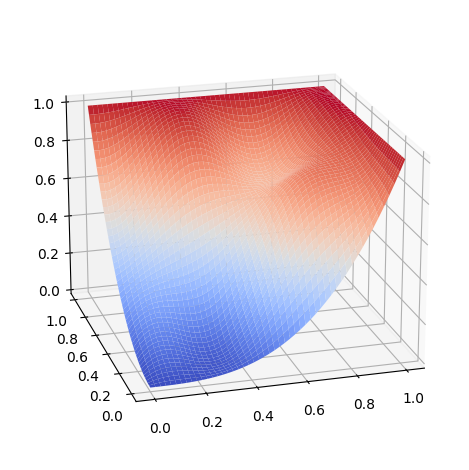

In [13]:
#程序文件ex17_5.py
from scipy import sparse
from scipy.sparse.linalg import spsolve
import numpy as np
import pylab as plt


def rhs_func(x, y, M):  #定义右端项
    g = (20 * np.cos(3 * np.pi * X[1:-1, 1:-1]) *
         np.sin(2 * np.pi * Y[1:-1, 1:-1])).flatten()
    f = [g[i::M - 2] for i in range(M - 2)]  #抽取内部值
    f = np.array(f).flatten()  # 展开成((M-2)**2, )数组
    return f


def bc_dirichlet(x, y, M):  #定义Dirichlet边界条件
    lBC = y[:, 0] ** 2
    leftBC = lBC[1:M - 1]
    rBC = np.ones(M)
    rightBC = rBC[1:M - 1]
    tBC = x[0, :] ** 3
    topBC = tBC[1:M - 1]
    bBC = np.ones(M)
    bottomBC = bBC[1:M - 1]
    g1 = np.zeros((M - 2) ** 2)
    for i in range(M - 2): g1[(M - 2) * i] = topBC[i]
    for j in range(M - 2): g1[(M - 2) * (j + 1) - 1] = bottomBC[j]
    k1 = np.zeros((len(leftBC), 1))
    k1[0] = 1.0
    leftBCk = sparse.kron(k1, leftBC).toarray().flatten()
    k2 = np.zeros((len(rightBC), 1))
    k2[-1] = 1.0
    rightBCk = sparse.kron(k2, rightBC).toarray().flatten()
    g = g1 + leftBCk + rightBCk
    return [g, lBC, tBC, rBC, bBC]


def generate_lhs_matrix(M, hx, hy):  #定义线性方程组系数矩阵
    alpha = hx ** 2 / hy ** 2
    n = M - 2
    main_diag = 2 * (1 + alpha) * np.ones(n)
    off_diag = -1 * np.ones(n)
    diagonals = [main_diag, off_diag, off_diag]
    B = sparse.diags(diagonals, [0, -1, 1], shape=(n, n)).toarray()
    C = sparse.diags([-1 * np.ones(M)], [0], shape=(n, n)).toarray()
    e1 = np.eye(n)
    A1 = sparse.kron(e1, B).toarray()
    e2 = sparse.diags([np.ones(M), np.ones(M)], [-1, 1], shape=(n, n)).toarray()
    A2 = sparse.kron(e2, C).toarray()
    mat = A1 + A2
    return mat


M = 50
(x0, xf) = (0.0, 1.0)
(y0, yf) = (0.0, 1.0)
hx = (xf - x0) / (M - 1)
hy = (yf - y0) / (M - 1)
x1 = np.linspace(x0, xf, M)
y1 = np.linspace(y0, yf, M)
X, Y = np.meshgrid(x1, y1)  #生成网格数据
frhs = rhs_func(X, Y, M)  #右端项的值
fbc = bc_dirichlet(X, Y, M)  #边界条件值
rhs = frhs * (hx ** 2) + fbc[0]
A = generate_lhs_matrix(M, hx, hy)
V = np.linalg.solve(A, rhs)  #解线性方
V = V.reshape((M - 2, M - 2)).T
U = np.zeros((M, M))  #初始化
U[1:M - 1, 1:M - 1] = V
U[:, 0] = fbc[1]
U[0, :] = fbc[2]
U[:, M - 1] = fbc[3]
U[M - 1, :] = fbc[4]
print('所求的数值解为：\n', U)
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, U, cmap=plt.cm.coolwarm)
plt.tight_layout()
ax.view_init(20, -106)
plt.show()

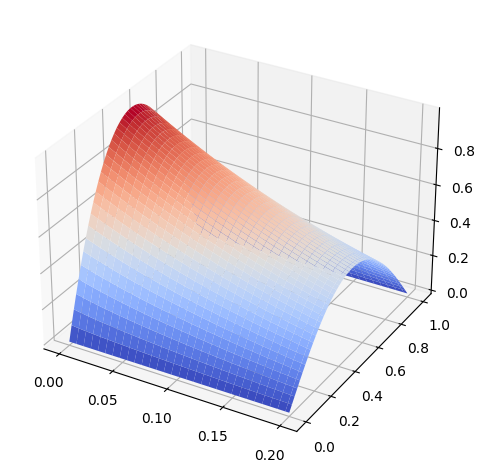

In [14]:
#程序文件ex17_6.py
import numpy as np
from scipy import sparse
import pylab as plt

M = 50
N = 60  #空间和时间的点数
x0 = 0
xL = 1
dx = (xL - x0) / (M - 1)  #空间步长
t0 = 0
tF = 0.2
dt = (tF - t0) / (N - 1)  #时间步长
D = 0.1
alpha = -3  #扩散系数和反应率
r = dt * D / dx ** 2;
s = dt * alpha
xspan = np.linspace(x0, xL, M)
tspan = np.linspace(t0, tF, N)
main_diag = (1 + 2 * r - s) * np.ones(M - 2)
off_diag = -r * np.ones(M - 3)
n = M - 2
diagonals = [main_diag, off_diag, off_diag]
A = sparse.diags(diagonals, [0, -1, 1], shape=(n, n)).toarray()

U = np.zeros((M, N))  #解的初始化
U[:, 0] = 4 * xspan - 4 * xspan ** 2  #初值条件
U[0, :] = 0.0
U[-1, :] = 0.0  #边界条件
for k in range(1, N):
    c = np.zeros(M - 4)
    b1 = np.array([r * U[0, k], r * U[-1, k]])
    b1 = np.insert(b1, 1, c)
    b2 = U[1:M - 1, k - 1]
    b = b1 + b2  #线性方程组常数项
    U[1:M - 1, k] = np.linalg.solve(A, b)  #解线性方程组

X, T = np.meshgrid(tspan, xspan)
ax = plt.axes(projection='3d')
ax.plot_surface(X, T, U, linewidth=0, cmap=plt.cm.coolwarm)
ax.set_xticks([0, 0.05, 0.1, 0.15, 0.2])
plt.tight_layout()
plt.show()